# <font color=black> Analysis - FC-based parcellation using correlation </font>
<hr style="border:1px solid black">

In [2]:
import sys,json
import glob, os
import numpy as np
import nibabel as nib
import time
from nilearn import datasets, plotting, image, surface
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

sys.path.append('/media/miplab-nas2/Data3/BMPD/hc_project/analysis/code/')

from fc_based_parcellation import FC_Parcellation

%matplotlib inline
%load_ext autoreload
%autoreload 2

# Initialization
<hr style="border:0.5px solid black">

### Load existing configuration file ...

In [3]:
# Load the config file with all information
filetag = "C1toC7_gm_07_to_iCAP_SMC"
with open('../../../brain_spine/results/fc_parcellation/corr/' + filetag + '/config_' + filetag + '.json') as config_file:
    config = json.load(config_file)
source = 'spinalcord'
target = 'brain'
# Instantiate class
# Note: this will save a config file with all relevant information and prepare folder structure
fc_parcellation = FC_Parcellation(config,source,target,'corr')

### ... or build new one

In [2]:
# Load the config file with all information
with open('../../config/config_fc_based_parcellation_NK.json') as config_file:
    config = json.load(config_file)
# Define tag of this analysis (used for saving)
config['output_tag'] = "C1toC7_gm_07_notsmoothed_to_wholebrain"
# Define source, target, and the corresponding masks
source = 'spinalcord'
target = 'brain'
# Note: paths should be with respect to main directory
config['file_tag']['spinalcord'] = "_task-rest_bold_stc_sc_moco_brsc_BP_inTemplate.nii.gz"
config['file_tag']['brain'] = "_task-rest_bold_stc_brain_moco_brsc_BP_reg_SPM_inTemplate3mm_s.nii.gz"

config['masks']['source'] = "/templates/PAM50_hc_project/template/PAM50_gm_bin07_C1C7.nii.gz"
config['masks']['target'] = "/analysis/masks/brain_old_3mm/MNI_GM_3mm.nii.gz"

config['brain_surfaces']='/templates/surf/'

config['list_subjects'] = ["P030", "P099","A006","A007","A008","A009","A011","A013","A023","A024","A025","A026","A027","A028","A029","A030","A032","A033","A034","A036","A037","A038","A039","A043","A044","A045","A046","A048","A050","A051","A052"]

# Instantiate class
# Note: this will save a config file with all relevant information and prepare folder structure
fc_parcellation = FC_Parcellation(config,source,target,'corr')

# Analyses
<hr style="border:0.5px solid black">

### Compute the voxelwise correlation & run clustering for each subject independently

In [247]:
start = time.time()
# Loop through the subjects to compute fc and clustering 
for sub_id,sub in enumerate(fc_parcellation.config['list_subjects']): 
    print(f'\033[1mSUBJECT {sub}\033[0m')
    # Compute correlation without saving files
    fc_parcellation.compute_voxelwise_fc(sub=sub, 
                                        overwrite=False)
    # Run clustering and save labels
    fc_parcellation.run_clustering(sub=sub,
                                    k_range=range(8,14),algorithm='kmeans',
                                    overwrite=False)
print("\033[1m... Operation performed in %.2f s!\033[0m" % (time.time() - start))

SUBJECT P030
COMPUTE VOXELWISE FC
Standardize = True
Overwrite results = False
... FC already computed

DONE
CLUSTERING AT THE INDIVIDUAL LEVEL
Algorithm = kmeans
K value(s) = range(8, 14)
Overwrite results = False
K = 8
... Loading FC from file
... Running k-means clustering
K = 9
... Loading FC from file
... Running k-means clustering
K = 10
... Loading FC from file
... Running k-means clustering
K = 11
... Loading FC from file
... Running k-means clustering
K = 12
... Loading FC from file
... Running k-means clustering
K = 13
... Loading FC from file
... Running k-means clustering


SUBJECT P099
COMPUTE VOXELWISE FC
Standardize = True
Overwrite results = False
... FC already computed

DONE
CLUSTERING AT THE INDIVIDUAL LEVEL
Algorithm = kmeans
K value(s) = range(8, 14)
Overwrite results = False
K = 8
... Loading FC from file
... Running k-means clustering
K = 9
... Loading FC from file
... Running k-means clustering
K = 10
... Loading FC from file
... Running k-means clustering
K = 1

... Running k-means clustering
K = 9
... Loading FC from file
... Running k-means clustering
K = 10
... Loading FC from file
... Running k-means clustering
K = 11
... Loading FC from file
... Running k-means clustering
K = 12
... Loading FC from file
... Running k-means clustering
K = 13
... Loading FC from file
... Running k-means clustering


SUBJECT A028
COMPUTE VOXELWISE FC
Standardize = True
Overwrite results = False
... FC already computed

DONE
CLUSTERING AT THE INDIVIDUAL LEVEL
Algorithm = kmeans
K value(s) = range(8, 14)
Overwrite results = False
K = 8
... Loading FC from file
... Running k-means clustering
K = 9
... Loading FC from file
... Running k-means clustering
K = 10
... Loading FC from file
... Running k-means clustering
K = 11
... Loading FC from file
... Running k-means clustering
K = 12
... Loading FC from file
... Running k-means clustering
K = 13
... Loading FC from file
... Running k-means clustering


SUBJECT A029
COMPUTE VOXELWISE FC
Standardize = True
Overwri

K = 11
... Loading FC from file
... Running k-means clustering
K = 12
... Loading FC from file
... Running k-means clustering
K = 13
... Loading FC from file
... Running k-means clustering


SUBJECT A045
COMPUTE VOXELWISE FC
Standardize = True
Overwrite results = False
... FC already computed

DONE
CLUSTERING AT THE INDIVIDUAL LEVEL
Algorithm = kmeans
K value(s) = range(8, 14)
Overwrite results = False
K = 8
... Loading FC from file
... Running k-means clustering
K = 9
... Loading FC from file
... Running k-means clustering
K = 10
... Loading FC from file
... Running k-means clustering
K = 11
... Loading FC from file
... Running k-means clustering
K = 12
... Loading FC from file
... Running k-means clustering
K = 13
... Loading FC from file
... Running k-means clustering


SUBJECT A046
COMPUTE VOXELWISE FC
Standardize = True
Overwrite results = False
... FC already computed

DONE
CLUSTERING AT THE INDIVIDUAL LEVEL
Algorithm = kmeans
K value(s) = range(8, 14)
Overwrite results = False
K

### Compute the group-level clustering and generate corresponding maps

In [248]:
fc_parcellation.group_clustering(k_range=range(8,14),indiv_algorithm='kmeans',overwrite=False)

CLUSTERING AT THE GROUP LEVEL
K value(s) = range(8, 14)
Overwrite results = False

K = 8
... Computing hierarchical clustering and relabeling
...... Loading all subjects
...... Clustering on all labels
...... Computing cophenetic correlation
...... Relabeling
...... Computing validity


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


K = 9
... Computing hierarchical clustering and relabeling
...... Loading all subjects
...... Clustering on all labels
...... Computing cophenetic correlation
...... Relabeling
...... Computing validity


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


K = 10
... Computing hierarchical clustering and relabeling
...... Loading all subjects
...... Clustering on all labels
...... Computing cophenetic correlation
...... Relabeling
...... Computing validity


/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


K = 11
... Computing hierarchical clustering and relabeling
...... Loading all subjects
...... Clustering on all labels
...... Computing cophenetic correlation
...... Relabeling


KeyboardInterrupt: 

In [8]:
fc_parcellation.prepare_target_maps(label_type='indiv',indiv_algorithm='spectral',k_range=[3,4],overwrite=False)

PREPARE TARGET MAPS
Type of source labels = indiv
K value(s) = [3, 4]
Features = fc
Overwrite results = False
K = 3
... Computing target maps
...... Subject P030
...... Subject P099
...... Subject A006
...... Subject A007
...... Subject A008
...... Subject A009
...... Subject A011
...... Subject A013
...... Subject A023
...... Subject A024
...... Subject A025
...... Subject A026
...... Subject A027
...... Subject A028
...... Subject A029
...... Subject A030
...... Subject A032
...... Subject A033
...... Subject A034
...... Subject A036
...... Subject A037
...... Subject A038
...... Subject A039
...... Subject A043
...... Subject A044
...... Subject A045
...... Subject A046
...... Subject A048
...... Subject A050
...... Subject A051
...... Subject A052
K = 4
... Computing target maps
...... Subject P030
...... Subject P099
...... Subject A006
...... Subject A007
...... Subject A008
...... Subject A009
...... Subject A011
...... Subject A013
...... Subject A023
...... Subject A024
......

In [9]:
fc_parcellation.prepare_target_maps(label_type='group_mode',indiv_algorithm='spectral',k_range=[3,4],overwrite=False)

PREPARE TARGET MAPS
Type of source labels = group_mode
K value(s) = [3, 4]
Features = fc
Overwrite results = False
K = 3
... Computing target maps
...... Subject P030
...... Subject P099
...... Subject A006
...... Subject A007
...... Subject A008
...... Subject A009
...... Subject A011
...... Subject A013
...... Subject A023
...... Subject A024
...... Subject A025
...... Subject A026
...... Subject A027
...... Subject A028
...... Subject A029
...... Subject A030
...... Subject A032
...... Subject A033
...... Subject A034
...... Subject A036
...... Subject A037
...... Subject A038
...... Subject A039
...... Subject A043
...... Subject A044
...... Subject A045
...... Subject A046
...... Subject A048
...... Subject A050
...... Subject A051
...... Subject A052
K = 4
... Computing target maps
...... Subject P030
...... Subject P099
...... Subject A006
...... Subject A007
...... Subject A008
...... Subject A009
...... Subject A011
...... Subject A013
...... Subject A023
...... Subject A024
.

### Statistics and WTA analysis

In [12]:
fc_parcellation.stats_target_maps(label_type='indiv',indiv_algorithm='spectral',k_range=[3,4],overwrite=False)

RUN STATISTICAL ANALYSIS
Type of source labels = indiv
K value(s) = [3, 4]
Features = fc
Overwrite results = False
K = 3
... Merging target files
... Running statistical analysis
randomise options: -i /media/miplab-nas2/Data3/BMPD/hc_project//brain_spine/results/fc_parcellation//corr/C1toC7_gm_07_to_iCAP_SMC/target/fc//K3/indiv_labels/maps_indiv/C1toC7_gm_07_to_iCAP_SMC_all_spectral_indiv_labels_targetmap_K3_1.nii.gz -m /media/miplab-nas2/Data3/BMPD/hc_project//analysis/masks/brain/iCAPs_z_SMC_bin.nii.gz -o /media/miplab-nas2/Data3/BMPD/hc_project//brain_spine/results/fc_parcellation//corr/C1toC7_gm_07_to_iCAP_SMC/target/fc//K3/indiv_labels/stats/spectral/K3_1 -1 
Loading Data: 
Data loaded
One-sample design detected; sign-flipping instead of permuting.
2.14748e+09 sign-flips required for exhaustive test of t-test 1
Doing 5000 random permutations
Warning! No output options selected. Outputing raw tstat only
Starting permutation 1 (Unpermuted data)
Finished, exiting.
... Merging target 

In [7]:
fc_parcellation.winner_takes_all(label_type='mean',features='sim',indiv_algorithm='agglom',apply_threshold=1,cluster_threshold=100,k=6, order=[1,6,3,5,4,2], overwrite=True)

RUN WINNER-TAKES-ALL ANALYSIS
Type of source labels = mean
K value = 6
Features = sim
Overwrite results = True
K1 will have a value of 1
K2 will have a value of 6
K3 will have a value of 3
K4 will have a value of 5
K5 will have a value of 4
K6 will have a value of 2
DONE



/home/kinany/anaconda3/lib/python3.9/site-packages/nilearn/masking.py:974: UserWarning: Data array used to create a new image contains 64-bit ints. This is likely due to creating the array with numpy and passing `int` as the `dtype`. Many tools such as FSL and SPM cannot deal with int64 in Nifti images, so for compatibility the data has been converted to int32.
  return new_img_like(mask_img, unmasked, affine)


# Plotting
<hr style="border:0.5px solid black">

### WTA maps

RUN PLOTTING BRAIN MAPS
K value = 6
Showing = target
Features = sim
Save figure = True


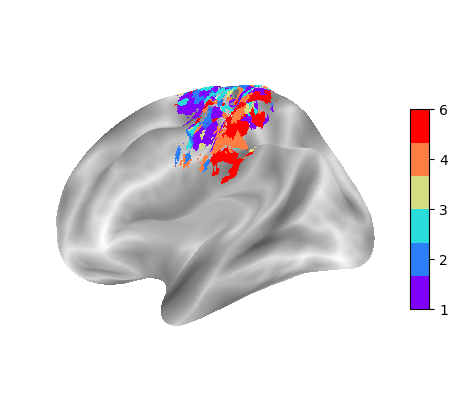

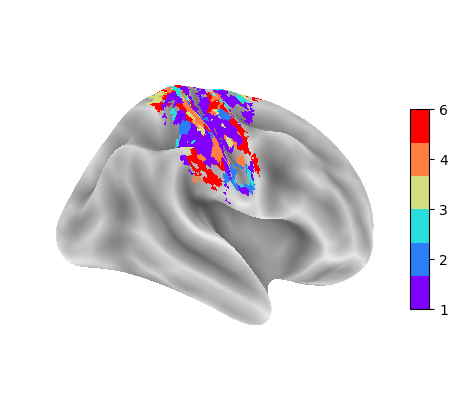

In [8]:
fc_parcellation.plot_brain_map(showing='target',k=6,label_type='mean',wta_fc_mean=False,indiv_algorithm='agglom',features='sim', save_figure=True)

### Plot label maps

RUN PLOTTING SPINAL MAPS
K value = 3
Showing = source
Features = fc
Save figure = True
The plotting is displayed in neurological orientation (Left > Right)


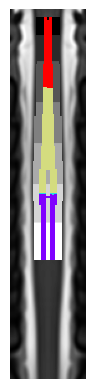

In [6]:
fc_parcellation.plot_spinal_map(showing='source',group_type='mode',indiv_algorithm='spectral', k=3, save_figure=True)

### Validity
<hr style="border:0.5px solid black">

### Plot validity metrics

VALIDITY METRICS
K value(s) = range(2, 14)
Features = fc
Saving figures = True



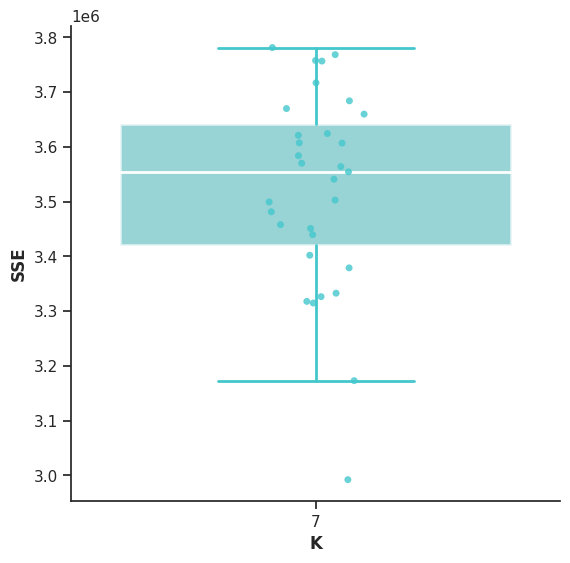

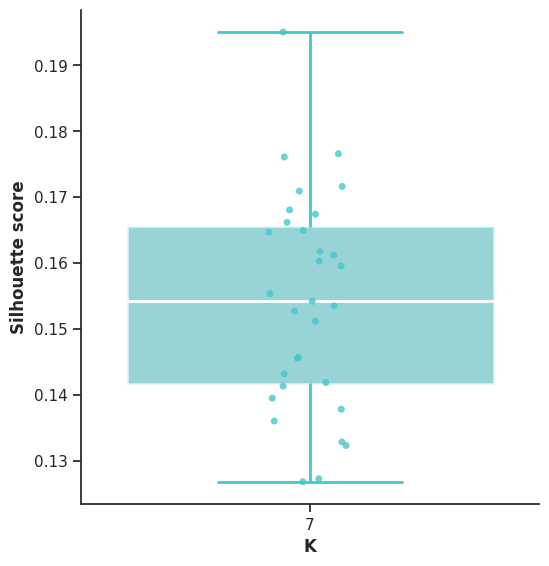

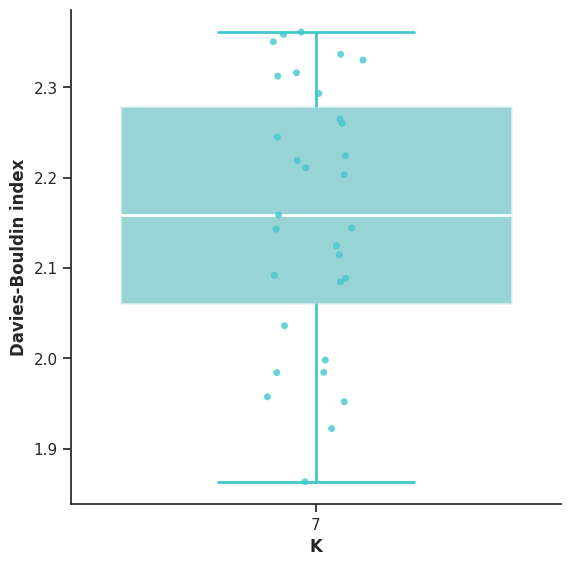

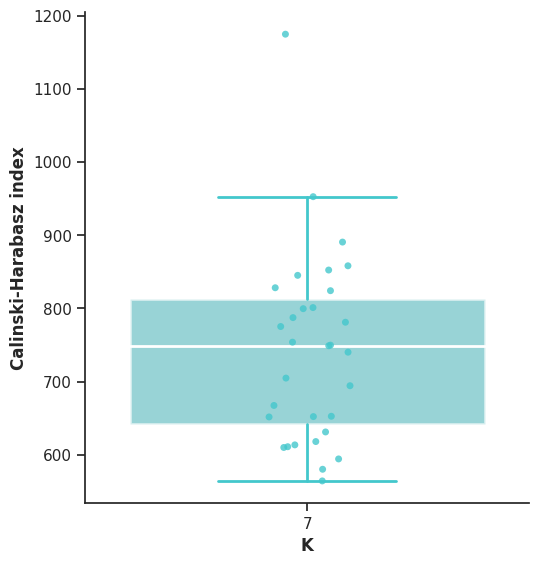

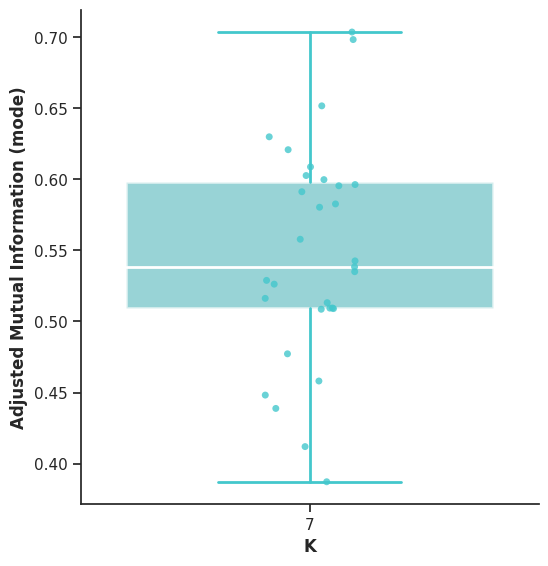

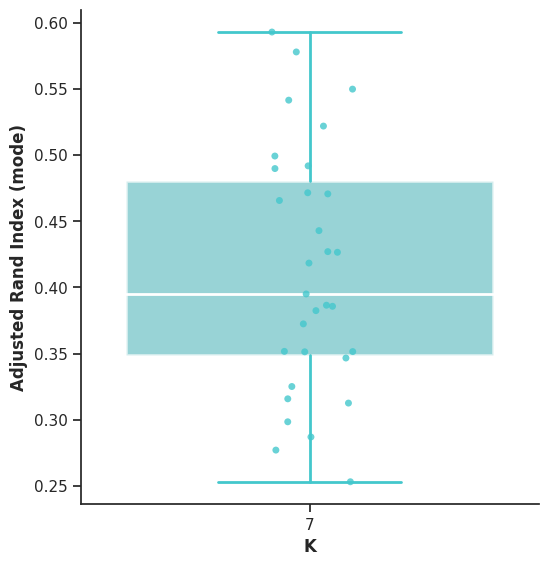

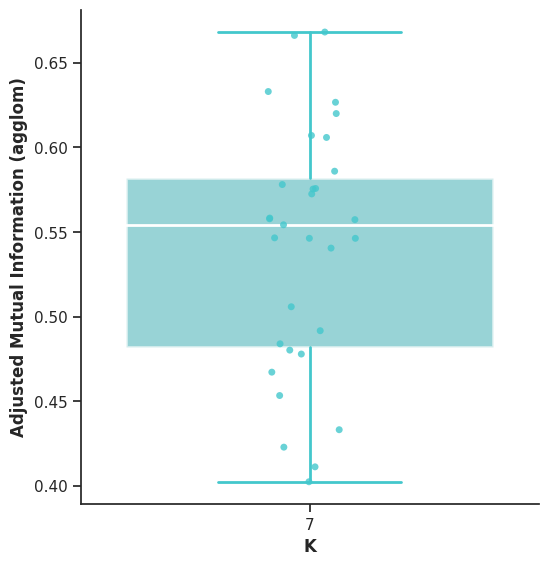

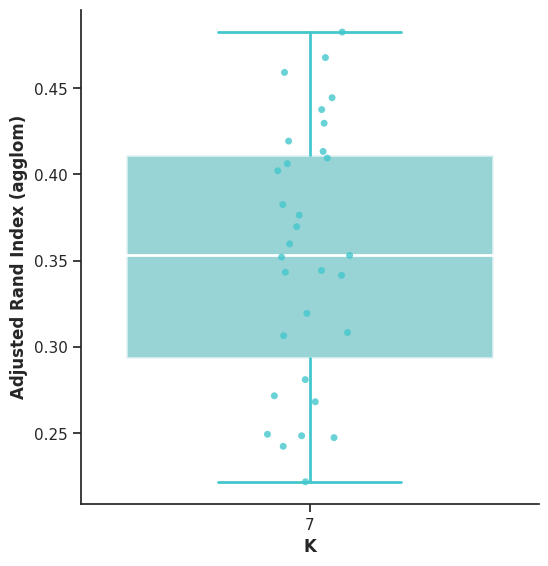

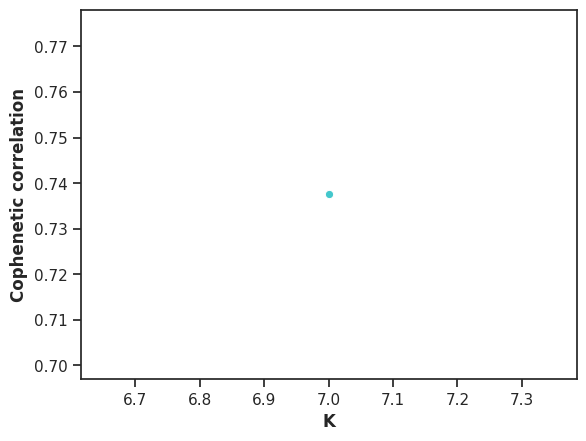

In [3]:
fc_parcellation.plot_validity(k_range=range(2,14),internal=["SSE", "silhouette", "davies", "calinski"], group=["ami_mode", "ari_mode","ami_agglom", "ari_agglom", "corr"], save_figures=True)